# Wuhan Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [3]:
wuhan_df = pd.read_csv('Resources/wuhan_data.csv', delimiter=", ")
wuhan_df.head()

/Users/kathrynrigsby/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,date,pm25,pm10,o3,no2,so2,co
0,2020/7/2,102.0,44.0,39.0,23.0,6,19.0
1,2020/7/3,111.0,24.0,82.0,20.0,3,7.0
2,2020/7/4,65.0,27.0,42.0,24.0,3,10.0
3,2020/7/5,73.0,17.0,21.0,18.0,3,9.0
4,2020/7/6,63.0,6.0,18.0,17.0,2,6.0


In [4]:
# Dropping columns not using
dropped_wuhan_df = wuhan_df.drop(["pm10","o3","no2","so2","co"],axis=1)
# dropped_wuhan_df

In [5]:
# Changing datatype from object to datetime
dropped_wuhan_df["date"] = pd.to_datetime(dropped_wuhan_df["date"])

In [6]:
# Dropping any data before 2017
droppedB4_17 = dropped_wuhan_df.loc[(dropped_wuhan_df["date"]>"2017-01-01")].dropna(how="any")
droppedB4_17.head()

,date,pm25
0,2020-07-02,102.0
1,2020-07-03,111.0
2,2020-07-04,65.0
3,2020-07-05,73.0
4,2020-07-06,63.0


### 2017 Data

In [7]:
# Dropping all data except January - July of 2017
wuhan_data_17 = droppedB4_17.loc[(droppedB4_17["date"]<"2017-07-25")].dropna(how='any')

In [8]:
# Create new AQI column
wuhan_data_17["AQI"]=""

In [9]:
# Calculate AQI
AQI2017 = []
for value in wuhan_data_17["pm25"]:
    if value >= 0 and value <= 12:
        AQI2017.append((((50-0)/(12-0))*(value-0))+ 0)
    elif value >=12.1 and value <= 35.4:
        AQI2017.append((((100-51)/(35.4-12.1))*(value-12.1))+51)
    elif value >= 35.5 and value <= 55.4:
        AQI2017.append((((150-101)/(55.4-35.5))*(value-35.5))+101)
    elif value >= 55.5 and value<= 150.4:
        AQI2017.append((((200-151)/(150.4-55.4))*(value-55.5))+151)
    elif value >= 150.5 and value <=250.4:
        AQI2017.append((((300-201)/(250.4-150.5))*(value-150.5))+201)
    elif value >= 250.5 and value <= 350.4:
        AQI2017.append((((400-301)/(350.4-250.5))*(value-250.5))+ 301)
    elif value >= 350.5 and value <= 500.4:
        AQI2017.append((((500-401)/(500.4-350.5))*(value-350.5))+ 401)
    else:
        AQI2017.append("invalid")
AQI2017 = [round(i,1) for i in AQI2017]

In [10]:
# Add newly calculated AQI to new AQI column
wuhan_data_17["AQI"]=AQI2017
wuhan_data_17.head()

,date,pm25,AQI
920,2017-07-02,52.0,141.6
921,2017-07-03,72.0,159.5
922,2017-07-04,124.0,186.3
923,2017-07-05,91.0,169.3
924,2017-07-06,79.0,163.1


In [11]:
# Create bins and labels
bins = [0,50,100,150,200,300,500]
quality = ["Good","Moderate","Unhealthy for Sensitive Groups","Unhealthy","Very Unhealthy","Hazardous"]

In [12]:
# Use bins and labels to create quality of AQI
wuhan_data_17["Levels of Concern"] = pd.cut(wuhan_data_17["AQI"],bins,labels=quality,include_lowest=True)
wuhan_data_17

,date,pm25,AQI,Levels of Concern
920,2017-07-02,52.0,141.6,Unhealthy for Sensitive Groups
921,2017-07-03,72.0,159.5,Unhealthy
922,2017-07-04,124.0,186.3,Unhealthy
923,2017-07-05,91.0,169.3,Unhealthy
924,2017-07-06,79.0,163.1,Unhealthy
...,...,...,...,...
1153,2017-03-28,139.0,194.1,Unhealthy
1154,2017-03-29,142.0,195.6,Unhealthy
1155,2017-03-30,170.0,220.3,Very Unhealthy
1156,2017-03-31,166.0,216.4,Very Unhealthy


In [13]:
# Export sorted Wuhan data to csv
wuhan_data_17.sort_values(by=["date"]).to_csv("output_data/wuhan_data_17.csv")

In [14]:
# Groupby date and calculate Mean,Max,Min
calculate_17 = wuhan_data_17.groupby(wuhan_data_17["date"].dt.strftime('%m'))
mean_df =calculate_17[["pm25","AQI"]].mean().reset_index(drop=False,inplace=False)
max_df = calculate_17[["pm25","AQI"]].max()
min_df = calculate_17[["pm25","AQI"]].min()
sem_df_17 = round(calculate_17["AQI"].sem(),2)

In [15]:
# Merge mean_df,max_df
result = pd.merge(mean_df,max_df, how='outer', on=['date'],suffixes=("_avg","_max"))

In [16]:
# Merge result,min_df
result2 = pd.merge(result,min_df, how='outer',on=['date'])

In [17]:
# Rename columns
wuhan_2017_month_df = result2.rename(columns={
                                    
                                    "date":"Month",
                                    "pm25_avg":"Avg pm2.5",
                                    "AQI_avg":"Avg AQI",
                                    "pm25_max":"Max pm2.5",
                                    "AQI_max":"Max AQI",
                                    "pm25":"Min pm2.5",
                                    "AQI":"Min AQI"
                                    
 })
wuhan_2017_month_df

,Month,Avg pm2.5,Avg AQI,Max pm2.5,Max AQI,Min pm2.5,Min AQI
0,01,175.413793,228.431034,273.0,323.3,76.0,161.6
1,02,166.750000,218.235714,262.0,312.4,100.0,174.0
2,03,161.290323,215.296774,297.0,347.1,110.0,179.1
3,04,137.400000,195.246667,171.0,221.3,58.0,152.3
4,05,140.322581,198.561290,234.0,283.7,74.0,160.5
5,06,123.000000,186.564286,161.0,211.4,75.0,161.1
6,07,75.047619,159.895238,124.0,186.3,47.0,129.3


In [18]:
# Dropping columns no longer using
wuhan_2017_df = wuhan_2017_month_df.drop(['Avg pm2.5', 'Max pm2.5','Max AQI','Min pm2.5','Min AQI'], axis=1)

### 2018 Data

In [19]:
# Dropping all data except January - July of 2018
wuhan_data_18 = droppedB4_17.loc[(droppedB4_17["date"]>"2017-12-31")&(droppedB4_17["date"]<"2018-07-25")].dropna(how='any')

In [20]:
# Create new AQI column
wuhan_data_18["AQI"]=""

In [21]:
# Calculate AQI
AQI2018 = []
for value in wuhan_data_18["pm25"]:
    if value >= 0 and value <= 12:
        AQI2018.append((((50-0)/(12-0))*(value-0))+ 0)
    elif value >=12.1 and value <= 35.4:
        AQI2018.append((((100-51)/(35.4-12.1))*(value-12.1))+51)
    elif value >= 35.5 and value <= 55.4:
        AQI2018.append((((150-101)/(55.4-35.5))*(value-35.5))+101)
    elif value >= 55.5 and value<= 150.4:
        AQI2018.append((((200-151)/(150.4-55.4))*(value-55.5))+151)
    elif value >= 150.5 and value <=250.4:
        AQI2018.append((((300-201)/(250.4-150.5))*(value-150.5))+201)
    elif value >= 250.5 and value <= 350.4:
        AQI2018.append((((400-301)/(350.4-250.5))*(value-250.5))+ 301)
    elif value >= 350.5 and value <= 500.4:
        AQI2018.append((((500-401)/(500.4-350.5))*(value-350.5))+ 401)
    else:
        AQI2018.append("invalid")
AQI2018 = [round(i,1) for i in AQI2018]

In [22]:
# Add newly calculated AQI to AQI column
wuhan_data_18["AQI"]=AQI2018 
wuhan_data_18.head()

,date,pm25,AQI
658,2018-07-02,95.0,171.4
659,2018-07-03,110.0,179.1
660,2018-07-04,132.0,190.5
661,2018-07-05,104.0,176.0
662,2018-07-06,73.0,160.0


In [23]:
# Create bins and labels
bins = [0,50,100,150,200,300,500]
quality = ["Good","Moderate","Unhealthy for Sensitive Groups","Unhealthy","Very Unhealthy","Hazardous"]

In [24]:
# Use bins and labels to create quality of AQI
wuhan_data_18["Levels of Concern"] = pd.cut(wuhan_data_18["AQI"],bins,labels=quality,include_lowest=True)
wuhan_data_18

,date,pm25,AQI,Levels of Concern
658,2018-07-02,95.0,171.4,Unhealthy
659,2018-07-03,110.0,179.1,Unhealthy
660,2018-07-04,132.0,190.5,Unhealthy
661,2018-07-05,104.0,176.0,Unhealthy
662,2018-07-06,73.0,160.0,Unhealthy
...,...,...,...,...
908,2018-03-28,140.0,194.6,Unhealthy
909,2018-03-29,153.0,203.5,Very Unhealthy
910,2018-03-30,157.0,207.4,Very Unhealthy
911,2018-03-31,175.0,225.3,Very Unhealthy


In [25]:
# Export Wuhan 2018 data to csv
wuhan_data_18.sort_values(by=["date"]).to_csv("output_data/wuhan_data_18.csv")

In [26]:
# Groupby date and calculate Mean,Max,Min
calculate_18 = wuhan_data_18.groupby(wuhan_data_18["date"].dt.strftime('%m'))
mean_df =calculate_18[["pm25","AQI"]].mean().reset_index(drop=False,inplace=False)
max_df = calculate_18[["pm25","AQI"]].max()
min_df = calculate_18[["pm25","AQI"]].min()

In [27]:
# Merge mean_df,max_df
result = pd.merge(mean_df,max_df, how='outer', on=['date'],suffixes=("_avg","_max"))

In [28]:
# Merge result,min_df
result2 = pd.merge(result,min_df, how='outer',on=['date'])

In [29]:
# Rename columns
wuhan_2018_month_df = result2.rename(columns={
                                    
                                    "date":"Month",
                                    "pm25_avg":"Avg pm2.5",
                                    "AQI_avg":"Avg AQI",
                                    "pm25_max":"Max pm2.5",
                                    "AQI_max":"Max AQI",
                                    "pm25":"Min pm2.5",
                                    "AQI":"Min AQI"
                                    
 })
wuhan_2018_month_df

,Month,Avg pm2.5,Avg AQI,Max pm2.5,Max AQI,Min pm2.5,Min AQI
0,01,179.466667,231.720000,255.0,305.5,117.0,182.7
1,02,155.785714,210.535714,205.0,255.0,82.0,164.7
2,03,142.580645,198.248387,175.0,225.3,95.0,171.4
3,04,146.933333,203.306667,227.0,276.8,79.0,163.1
4,05,120.677419,185.454839,166.0,216.4,66.0,156.4
5,06,113.448276,181.168966,158.0,208.4,67.0,156.9
6,07,97.750000,172.145833,132.0,190.5,48.0,131.8


In [30]:
# Dropping columns no longer using
wuhan_2018_df = wuhan_2018_month_df.drop(['Avg pm2.5', 'Max pm2.5','Max AQI','Min pm2.5','Min AQI'], axis=1)

### 2019 Data

In [31]:
# Dropping all data except January - July of 2019
wuhan_data_19 = droppedB4_17.loc[(droppedB4_17["date"]>"2018-12-31")&(droppedB4_17["date"]<"2019-07-25")].dropna(how='any')

In [32]:
# Create new AQI column
wuhan_data_19["AQI"]=""

In [33]:
# Calculate AQI
AQI2019 = []
for value in wuhan_data_19["pm25"]:
    if value >= 0 and value <= 12:
        AQI2019.append((((50-0)/(12-0))*(value-0))+ 0)
    elif value >=12.1 and value <= 35.4:
        AQI2019.append((((100-51)/(35.4-12.1))*(value-12.1))+51)
    elif value >= 35.5 and value <= 55.4:
        AQI2019.append((((150-101)/(55.4-35.5))*(value-35.5))+101)
    elif value >= 55.5 and value<= 150.4:
        AQI2019.append((((200-151)/(150.4-55.4))*(value-55.5))+151)
    elif value >= 150.5 and value <=250.4:
        AQI2019.append((((300-201)/(250.4-150.5))*(value-150.5))+201)
    elif value >= 250.5 and value <= 350.4:
        AQI2019.append((((400-301)/(350.4-250.5))*(value-250.5))+ 301)
    elif value >= 350.5 and value <= 500.4:
        AQI2019.append((((500-401)/(500.4-350.5))*(value-350.5))+ 401)
    else:
        AQI2019.append("invalid")
AQI2019 = [round(i,1) for i in AQI2019]

In [34]:
# Add newly AQI values to AQI column
wuhan_data_19["AQI"] = AQI2019
wuhan_data_19.head()

,date,pm25,AQI
296,2019-07-02,91.0,169.3
297,2019-07-03,127.0,187.9
298,2019-07-04,131.0,189.9
299,2019-07-05,121.0,184.8
300,2019-07-06,138.0,193.6


In [35]:
# Create bins and labels
bins = [0,50,100,150,200,300,500]
quality = ["Good","Moderate","Unhealthy for Sensitive Groups","Unhealthy","Very Unhealthy","Hazardous"]

In [36]:
# Use bins and labels to create quality of AQI
wuhan_data_19["Levels of Concern"] = pd.cut(wuhan_data_19["AQI"],bins,labels=quality,include_lowest=True)
wuhan_data_19

,date,pm25,AQI,Levels of Concern
296,2019-07-02,91.0,169.3,Unhealthy
297,2019-07-03,127.0,187.9,Unhealthy
298,2019-07-04,131.0,189.9,Unhealthy
299,2019-07-05,121.0,184.8,Unhealthy
300,2019-07-06,138.0,193.6,Unhealthy
...,...,...,...,...
562,2019-03-28,152.0,202.5,Very Unhealthy
563,2019-03-29,167.0,217.4,Very Unhealthy
564,2019-03-30,165.0,215.4,Very Unhealthy
565,2019-03-31,166.0,216.4,Very Unhealthy


In [37]:
# Export Wuhan 2019 data to csv
wuhan_data_19.sort_values(by=["date"]).to_csv("output_data/wuhan_data_19.csv")

In [38]:
# Groupby date and calculate Mean,Max,Min
calculate_19 = wuhan_data_19.groupby(wuhan_data_19["date"].dt.strftime('%m'))
mean_df =calculate_19[["pm25","AQI"]].mean().reset_index(drop=False,inplace=False)
max_df = calculate_19[["pm25","AQI"]].max()
min_df = calculate_19[["pm25","AQI"]].min()

In [39]:
# Merge mean_df,max_df
result = pd.merge(mean_df,max_df, how='outer', on=['date'],suffixes=("_avg","_max"))

In [40]:
# Merge result,min_df
result2 = pd.merge(result,min_df, how='outer',on=['date'])
result2

,date,pm25_avg,AQI_avg,pm25_max,AQI_max,pm25,AQI
0,01,180.166667,232.173333,248.0,297.6,116.0,182.2
1,02,153.555556,208.066667,195.0,245.1,78.0,162.6
2,03,145.129032,200.274194,185.0,235.2,99.0,173.4
3,04,126.000000,187.823333,161.0,211.4,65.0,155.9
4,05,125.516129,187.783871,162.0,212.4,64.0,155.4
5,06,111.103448,179.675862,148.0,198.7,57.0,151.8
6,07,102.541667,175.262500,138.0,193.6,74.0,160.5


In [41]:
# Rename columns
wuhan_2019_month_df = result2.rename(columns={
                                    
                                    "date":"Month",
                                    "pm25_avg":"Avg pm2.5",
                                    "AQI_avg":"Avg AQI",
                                    "pm25_max":"Max pm2.5",
                                    "AQI_max":"Max AQI",
                                    "pm25":"Min pm2.5",
                                    "AQI":"Min AQI"
 })
wuhan_2019_month_df

,Month,Avg pm2.5,Avg AQI,Max pm2.5,Max AQI,Min pm2.5,Min AQI
0,01,180.166667,232.173333,248.0,297.6,116.0,182.2
1,02,153.555556,208.066667,195.0,245.1,78.0,162.6
2,03,145.129032,200.274194,185.0,235.2,99.0,173.4
3,04,126.000000,187.823333,161.0,211.4,65.0,155.9
4,05,125.516129,187.783871,162.0,212.4,64.0,155.4
5,06,111.103448,179.675862,148.0,198.7,57.0,151.8
6,07,102.541667,175.262500,138.0,193.6,74.0,160.5


In [42]:
# No longer using these columns
wuhan_2019_df = wuhan_2019_month_df.drop(['Avg pm2.5', 'Max pm2.5','Max AQI','Min pm2.5','Min AQI'], axis=1)

### 2020 Data

In [43]:
# Dropping all data except January - July of 2020
wuhan_data_20 = droppedB4_17.loc[(droppedB4_17["date"]>"2019-12-31")&(droppedB4_17["date"]<"2020-07-25")].dropna(how='any')

In [44]:
# Create new AQI column
wuhan_data_20["AQI"]=""

In [45]:
# Calculate AQI
AQI2020 = []
for value in wuhan_data_20["pm25"]:
    if value >= 0 and value <= 12:
        AQI2020.append((((50-0)/(12-0))*(value-0))+ 0)
    elif value >=12.1 and value <= 35.4:
        AQI2020.append((((100-51)/(35.4-12.1))*(value-12.1))+51)
    elif value >= 35.5 and value <= 55.4:
        AQI2020.append((((150-101)/(55.4-35.5))*(value-35.5))+101)
    elif value >= 55.5 and value<= 150.4:
        AQI2020.append((((200-151)/(150.4-55.4))*(value-55.5))+151)
    elif value >= 150.5 and value <=250.4:
        AQI2020.append((((300-201)/(250.4-150.5))*(value-150.5))+201)
    elif value >= 250.5 and value <= 350.4:
        AQI2020.append((((400-301)/(350.4-250.5))*(value-250.5))+ 301)
    elif value >= 350.5 and value <= 500.4:
        AQI2020.append((((500-401)/(500.4-350.5))*(value-350.5))+ 401)
    else:
        AQI2020.append("invalid")
AQI2020 = [round(i,1) for i in AQI2020]

In [46]:
# Add newly calculated AQI values to AQI column
wuhan_data_20["AQI"] = AQI2020
wuhan_data_20.head()

,date,pm25,AQI
0,2020-07-02,102.0,175.0
1,2020-07-03,111.0,179.6
2,2020-07-04,65.0,155.9
3,2020-07-05,73.0,160.0
4,2020-07-06,63.0,154.9


In [47]:
# Create bins and labels
bins = [0,50,100,150,200,300,500]
quality = ["Good","Moderate","Unhealthy for Sensitive Groups","Unhealthy","Very Unhealthy","Hazardous"]

In [48]:
# Use bins and labels to create quality of AQI
wuhan_data_20["Levels of Concern"] = pd.cut(wuhan_data_20["AQI"],bins,labels=quality,include_lowest=True)
wuhan_data_20

,date,pm25,AQI,Levels of Concern
0,2020-07-02,102.0,175.0,Unhealthy
1,2020-07-03,111.0,179.6,Unhealthy
2,2020-07-04,65.0,155.9,Unhealthy
3,2020-07-05,73.0,160.0,Unhealthy
4,2020-07-06,63.0,154.9,Unhealthy
...,...,...,...,...
201,2020-01-28,137.0,193.0,Unhealthy
202,2020-01-29,154.0,204.5,Very Unhealthy
203,2020-01-30,154.0,204.5,Very Unhealthy
204,2020-01-31,153.0,203.5,Very Unhealthy


In [49]:
# Export Wuhan 2020 data to csv
wuhan_data_20.sort_values(by=["date"]).to_csv("output_data/wuhan_data_20.csv")

In [72]:
# Groupby date and calculate Mean,Max,Min
calculate_20 = wuhan_data_20.groupby(wuhan_data_20["date"].dt.strftime('%m'))..reset_index
# max_df = calculate_20[["pm25","AQI"]].max()
# mean_df =calculate_20[["pm25","AQI"]].mean().reset_index(drop=False,inplace=False)
# max_df = calculate_20[["pm25","AQI"]].max()
# min_df = calculate_20[["pm25","AQI"]].min()

SyntaxError: invalid syntax (<ipython-input-72-65c1f9567a3b>, line 2)

In [71]:
# Merge mean_df,max_df
result = pd.merge(mean_df,max_df, how='outer', on=['date'],suffixes=("_avg","_max"))

In [52]:
# Merge result,min_df
result2 = pd.merge(result,min_df, how='outer',on=['date'])

In [53]:
# Rename columns
wuhan_2020_month_df = result2.rename(columns={
                                    
                                    "date":"Month",
                                    "pm25_avg":"Avg pm2.5",
                                    "AQI_avg":"Avg AQI",
                                    "pm25_max":"Max pm2.5",
                                    "AQI_max":"Max AQI",
                                    "pm25":"Min pm2.5",
                                    "AQI":"Min AQI"
                                    
 })
wuhan_2020_month_df

,Month,Avg pm2.5,Avg AQI,Max pm2.5,Max AQI,Min pm2.5,Min AQI
0,01,146.000000,203.723333,194.0,244.1,70.0,158.5
1,02,122.689655,187.775862,184.0,234.2,66.0,156.4
2,03,119.870968,184.509677,157.0,207.4,59.0,152.8
3,04,113.100000,180.300000,156.0,206.5,47.0,129.3
4,05,118.225806,183.493548,158.0,208.4,72.0,159.5
5,06,84.100000,165.750000,133.0,191.0,56.0,151.3
6,07,78.833333,157.370833,145.0,197.2,29.0,86.5


In [54]:
# No longer using these columns
wuhan_2020_df = wuhan_2020_month_df.drop(['Avg pm2.5', 'Max pm2.5','Max AQI','Min pm2.5','Min AQI'], axis=1)

### Merging the Data

In [55]:
# Merge wuhan_2017_df,wuhan_2018_df
monthly1 = pd.merge(wuhan_2017_df,wuhan_2018_df,how='outer',on=["Month"],suffixes=("_17","_18"))


In [56]:
# Merge monthly1,wuhan_2019_df
monthly2 = pd.merge(monthly1,wuhan_2019_df,how='outer',on=["Month"])

In [57]:
# Rename columns
merging_data = monthly2.rename(columns={
    
                                           
                                            "Avg AQI":"Avg AQI_19",
                                        
    
                                            })


In [58]:
# Merge merging_data,wuhan_2020_df
monthly3 = pd.merge(merging_data,wuhan_2020_df,how='outer',on=["Month"])

In [59]:
# Rename columns
wuhan_summary_data = monthly3.rename(columns={
    
                                           
                                            "Avg AQI":"Avg AQI_20",
                                        
    
                                            })

wuhan_summary_data

,Month,Avg AQI_17,Avg AQI_18,Avg AQI_19,Avg AQI_20
0,01,228.431034,231.720000,232.173333,203.723333
1,02,218.235714,210.535714,208.066667,187.775862
2,03,215.296774,198.248387,200.274194,184.509677
3,04,195.246667,203.306667,187.823333,180.300000
4,05,198.561290,185.454839,187.783871,183.493548
5,06,186.564286,181.168966,179.675862,165.750000
6,07,159.895238,172.145833,175.262500,157.370833


In [60]:
# Export final Wuhan summary data to csv
wuhan_summary_data.to_csv("output_data/wuhan_summary_data.csv",index=False)

### Plotting the Data

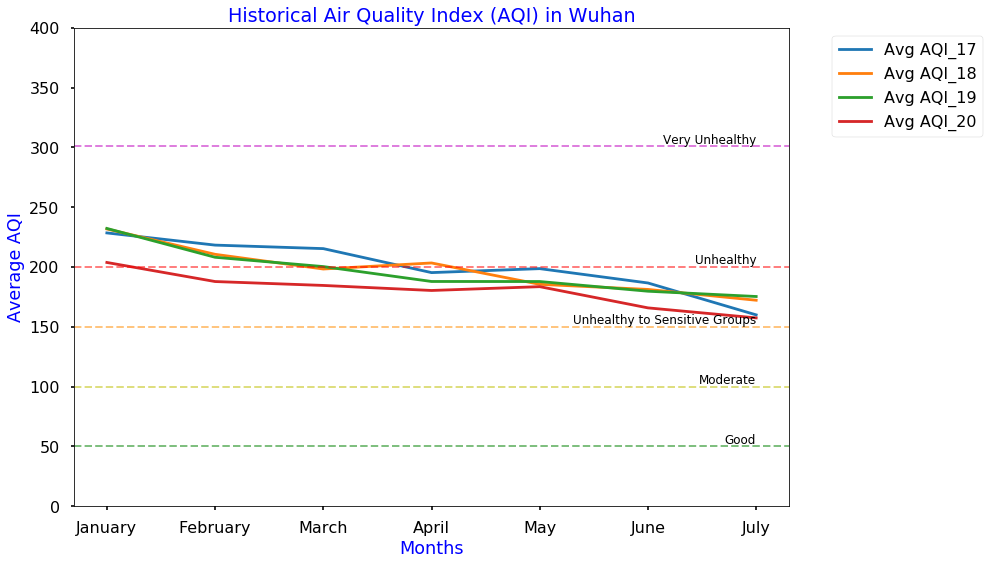

In [75]:
plt.style.use('seaborn-poster')
wuhan_summary_data.plot(y=["Avg AQI_17","Avg AQI_18","Avg AQI_19","Avg AQI_20"])
plt.title("Average AQI", color="blue")
plt.xlabel("Months",color="blue")
plt.ylabel("AQI",color="blue")
plt.xticks(np.arange(7),("January","February","March","April","May","June","July"))


plt.axhline(y=301,color='m', alpha=.5, linestyle='--', lw=2)
plt.text(6,301,'Very Unhealthy', ha='right', va='bottom', fontsize=12)
plt.axhline(y=200,color='r', alpha=.5, linestyle='--', lw=2)
plt.text(6,200,'Unhealthy', ha='right', va='bottom', fontsize=12)
plt.axhline(y=150,color='darkorange', alpha=.5, linestyle='--', lw=2)
plt.text(6,150,'Unhealthy to Sensitive Groups', ha='right', va='bottom', fontsize=12)
plt.axhline(y=100,color='y', alpha=.5, linestyle='--', lw=2)
plt.text(6,100,'Moderate', ha='right', va='bottom', fontsize=12)
plt.axhline(y=50,color='g', alpha=.5, linestyle='--', lw=2)
plt.text(6,50,'Good', ha='right', va='bottom', fontsize=12)
plt.ylim(0,400)
plt.title("Historical Air Quality Index (AQI) in Wuhan")
plt.legend(bbox_to_anchor=(1.05,1.0),loc='upper left')
plt.ylabel("Average AQI")

plt.savefig("output_data/wuhan_plot.png")
plt.show()

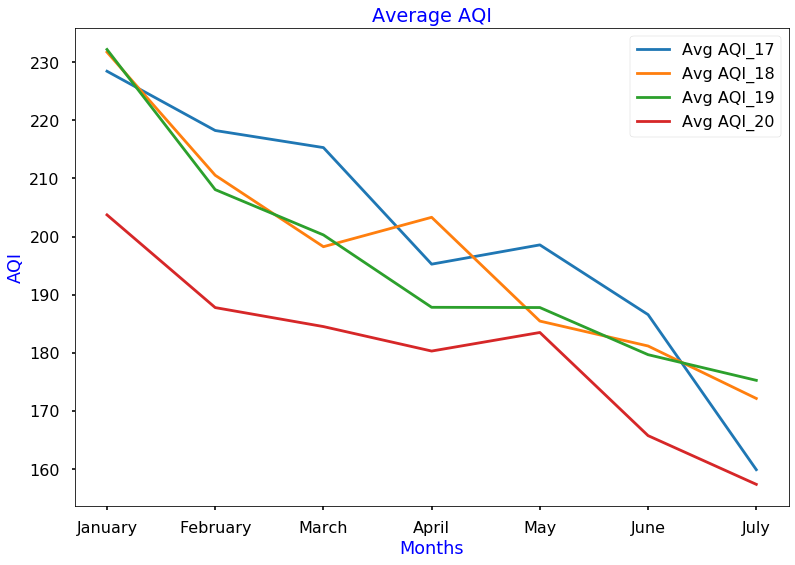

In [76]:
wuhan_summary_data.plot(y=["Avg AQI_17","Avg AQI_18","Avg AQI_19","Avg AQI_20"])
plt.title("Average AQI", color="blue")
plt.xlabel("Months",color="blue")
plt.ylabel("AQI",color="blue")
plt.xticks(np.arange(7),("January","February","March","April","May","June","July"))
plt.savefig("output_data/wuhan_plot.png")
plt.show()

### Shut down Policy

* January 9 - WHO announces mysterious coronavirus-related pneumonia in Wuhan, China
* January 23 - Wuhan now under quarantine
* February 2 - Global Air Travel is restricted
* March 11 - WHO declares Covid-19 a pandemic
* March 18 - China reports no new cases
* June 30 (according to Reuters article) - Wuhan slowly returning to normal with masks

(Data source: 
* https://www.ajmc.com/focus-of-the-week/a-timeline-of-covid19-developments-in-2020///?p=4)
* https://abcnews.go.com/Health/timeline-coronavirus-started/story?id=69435165
* https://www.reuters.com/article/us-health-coronavirus-anniversary/six-months-after-viral-pneumonia-wuhan-returning-to-normal-with-masks-idUSKBN2411XV

### Cases

* Taken from Johns Hopkins website around 10:00 a.m. this morning (https://coronavirus.jhu.edu/region/china)

#### Country

* Deaths: 4,658
* Confirmed cases: 87,213

#### Wuhan
* Deaths: 3,869
* Confirmed cases: 50,340